<img src="https://media.licdn.com/dms/image/C561BAQEVCDe44Tt-kQ/company-background_10000/0?e=2159024400&v=beta&t=BglJGcQeWT2zCaG1sbW30jo9YOGOUCqQ6TOPnWPlra4"/>

# Introduction to pandapower 

This is a very scaled down introduction to *pandapower* where we load in a JSON file using *pandapower* and use our previous knowledge of Pandas to explore and plot the data.

You can access good 'Getting Started' examples and the documentation via the [pandapower website](https://www.pandapower.org/start/)

### Import libraries

In [54]:
# Import Pandas and pandapower below. Be sure to import them correctly
import pandas as pn
import pandapower as pp
import numpy
import numba

### Networks
**1. Import the example network saved in 'ThreeBusPlot23.json'. Be sure to add the right path for your file!**

In [29]:
# Use padapower to load a the file called "ThreeBusPlot.json" and assign to a variable called 'net'
net = pp.from_json("Data/ThreeBusPlot23.json")

**2. Executing simply net will provide you with some details of what is contained within the network.**

In [70]:
# calling the network object provides some details of its structure
net

This pandapower network includes the following parameter tables:
   - bus (3 elements)
   - load (2 elements)
   - ext_grid (1 element)
   - line (3 elements)
   - line_geodata (3 elements)
   - bus_geodata (3 elements)
 and the following results tables:
   - res_bus (3 elements)
   - res_line (3 elements)
   - res_ext_grid (1 element)
   - res_load (2 elements)

**3. Print the object type of the 'line' attribute of 'net'. As you can see, under the hood, pandapower uses Dataframes.
Call net.line to view the dataframe and its contents.**

In [72]:
# print the object type of the line attribute of net
print(type(net.line))

<class 'pandas.core.frame.DataFrame'>


**4. Now run a power flow on the network using the pandapower.runpp function**

In [57]:
# run a power flow on the network using the pandapower runpp function 
pp.runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


**5. Explore the underlying data that contains the power flow results**

In [58]:
# Set some Dataframe variables up (called: 'df1', 'df2' and 'df3') so that they can be respectively 
# assigned to the 'line', 'res_line', and 'line_geodata' attributes of 'net'. Note these are shallow copies!
df1 = net.line
df2 = net.res_line
df3 = net.line_geodata

In [64]:
# explore the contents of the dataframes
print(df1)

   name std_type  from_bus  to_bus  length_km  r_ohm_per_km  x_ohm_per_km  \
0  None     None         0       1      484.0        0.0200         0.040   
1  None     None         1       2      484.0        0.0125         0.025   
2  None     None         2       0      484.0        0.0100         0.030   

    c_nf_per_km  g_us_per_km  max_i_ka   df  parallel  type  in_service  
0  1.000000e-09          0.0    1000.0  1.0         1  None        True  
1  1.000000e-09          0.0    1000.0  1.0         1  None        True  
2  1.000000e-09          0.0    1000.0  1.0         1  None        True  


In [66]:
# In df1, change the value of 'r_ohm_per_km' from 0.0125 to 0.07. This must be done in only one line.
# Once done, check to see if the change has been made.
df1.iloc[1,5]=0.07
print(df1)

   name std_type  from_bus  to_bus  length_km  r_ohm_per_km  x_ohm_per_km  \
0  None     None         0       1      484.0          0.02         0.040   
1  None     None         1       2      484.0          0.07         0.025   
2  None     None         2       0      484.0          0.01         0.030   

    c_nf_per_km  g_us_per_km  max_i_ka   df  parallel  type  in_service  
0  1.000000e-09          0.0    1000.0  1.0         1  None        True  
1  1.000000e-09          0.0    1000.0  1.0         1  None        True  
2  1.000000e-09          0.0    1000.0  1.0         1  None        True  


In [67]:
# Show that the change in 'df1' ALSO changes 'net.line' - Why would this happen?
print(net.line)

   name std_type  from_bus  to_bus  length_km  r_ohm_per_km  x_ohm_per_km  \
0  None     None         0       1      484.0          0.02         0.040   
1  None     None         1       2      484.0          0.07         0.025   
2  None     None         2       0      484.0          0.01         0.030   

    c_nf_per_km  g_us_per_km  max_i_ka   df  parallel  type  in_service  
0  1.000000e-09          0.0    1000.0  1.0         1  None        True  
1  1.000000e-09          0.0    1000.0  1.0         1  None        True  
2  1.000000e-09          0.0    1000.0  1.0         1  None        True  


**6. Rerun the power flow on the updated network. Does anything change in the net.res_line?**

In [68]:
# Rerun the power flow on the updated network. Does anything change in the net.res_line?
pp.runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


### Plotting

**7. From the pandapower.plotting module, import the simple_plotting convenience function and use it to plot the network.**

In [69]:
# plot the network using the pandapower convenience function
from pandapower.plotting import simple_plot

For more examples of basic plotting, take a look at the basic [plotting tutorial](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_basic.ipynb).

**8. With reference to [pandapower colormap tutorial](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_colormaps.ipynb), trying plotting a color map highlighting the line loadings for the 3 bus network. Check the lines dataframe to identify a color ranges that will highlight the different line loadings for this particular network loading.**

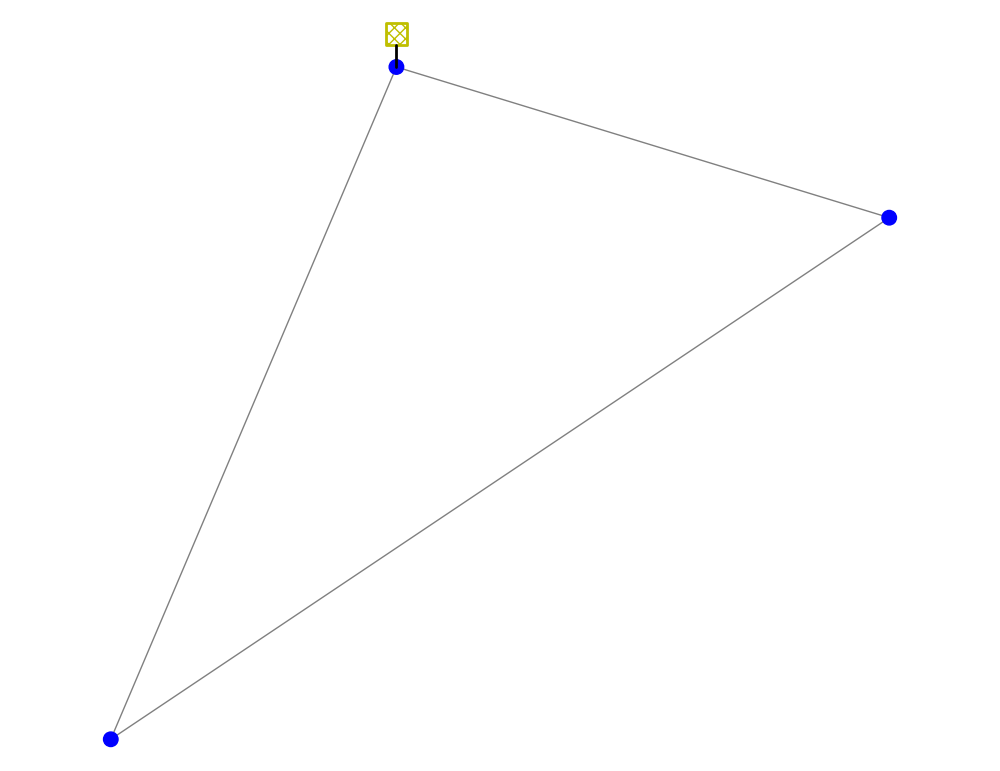

<Axes: >

In [74]:
# use collections to plot a colourmap showing line loading
simple_plot(net)

In [75]:
# plot the same figure on a matplotlib figure making use of the ax keyword within the draw_collections function.
import matplotlib.pyplot as plt


**9. Try adding a basemap to your plot. There are many ways in which you could do this, one library that makes this particularly helpful is contextily. Use the contextily.add_basemap function to add a basemap to your previous plot.**

Note: The coordinates within the network is gcs epsg:4326, e.g. lat long

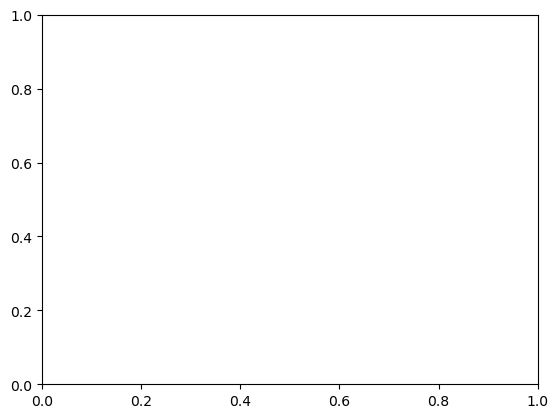

In [77]:
# add a basemap to your plot
import contextily as cx
fig, ax = plt.subplots()

cmap_list=[(0.01,"green")]

#inclomplete

For more geospatial analysis options, you might want to convert your pandapower dataframes into a geopandas dataframe.

**10. Create a GeoDataFrame from the bus and bus_geodata dataframes. Your GDF should have a 'geometry' column containing Point objects and have a crs assigned.**

In [9]:
# create a GeoDataFrame


### Timeseries
So far, the power flow has been solved for a single timestamp. How might you go about solving for a timeseries of load and generation?

**11. Write some pseudo code for a general structure of how you could achieve it.**

PandaPower has some built in functions that simplify this for you. Take a look at the [timeseries tutorial](https://github.com/e2nIEE/pandapower/blob/develop/tutorials/time_series.ipynb) if you want more information.